<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC13x** 

# **Linear Algebra**

## **Part 1. Linear Algebra**

### **1-1. 벡터의 내적**

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

</br>

- $\vec{c} \cdot \vec{d}$ 를 구해보세요. 
- 이 두 개의 vector가 orthogonal 관계 (직교)에 있는지 확인해보세요.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

In [4]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

##### **Q1. 두 벡터 c, d가 orthogonal 관계(직교)에 있다면 왜 그런지, 아니라면 왜 아닌지 쓰세요.**

In [5]:
np.dot(c,d)

42

**`이곳에 Q1에 대한 답을 작성하세요.`**

- 정답 : 벡터 내적 값이 42이고 0이 아니므로 직교 관계가 성립하지 않습니다. 

### **1-2. 행렬의 연산**


\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

</br>

- $E^{-1}$, $E^T$을 구하세요.





In [6]:
e = np.array([[7,4,2],[1,3,-1],[2,6,-4]])
e

array([[ 7,  4,  2],
       [ 1,  3, -1],
       [ 2,  6, -4]])

In [12]:
e_t = e.T
e_t

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

In [13]:
inv_e = np.linalg.inv(e)
inv_e 

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

##### **Q2. $E^{-1}$의 첫번째 row의 합을 반올림하여 소수점 둘째 자리까지 구한 값과 $E^T$의 첫번째 row의 합을 튜플 형태로 쓰세요. ex) (0.12, 22)** 

In [19]:
round(inv_e[0][:].sum(),2), e_t[0][:].sum()

(-0.35, 10)

  - 정답 : (-0.35, 10)

### **1-3. Determinant**

행렬 $F$ 를 활용하여 다음 `Q3` 질문에 답해봅니다.

</br>

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}



 



##### **Q3. $det(F)$ 값을 바탕으로 행렬 $F$ 에는 어떤 의미가 있는지 쓰세요.**

In [203]:
det_F = np.array([[2,-2,5],[4,1,10],[12,6,30]])
np.linalg.det(det_F)

0.0

  - 정답 : det(F)는 행렬식이고 det(F)값이 0이므로 역행렬이 존재하지 않습니다.

## **Part 2. PCA**

### **2-1. Covariance & Correlation**

- 다음 표를 보고 `S&P 500`과 `ABC Corp.`의 공분산과 상관계수를 구하세요.

  <img src='https://i.imgur.com/QBCt8yx.png' width=500>

##### **Q4. 공분산과 상관계수를 각각 반올림하여 소수점 둘째 자리까지 구하여 (공분산, 상관계수)의 형태로 쓰세요.** 

In [29]:
df= pd.DataFrame([[1692,68],
                  [1978,102],
                  [1884,110],
                  [2151, 112],
                  [2519, 154]]
                 columns = ['sp500', 'abc_corp'])

df.head()

,sp500,abc_corp
0,1692,68
1,1978,102
2,1884,110
3,2151,112
4,2519,154


In [31]:
np.cov(df.T)

array([[97732.7,  9107.3],
       [ 9107.3,   941.2]])

In [33]:
df.corr()

,sp500,abc_corp
sp500,1.000000,0.949574
abc_corp,0.949574,1.000000


In [39]:
np.cov(df.T)[1][0] , round(df.corr().sp500[1],2)

(9107.3, 0.95)

- 정답 : (9107.3, 0.95)

### **2-2. PCA**




In [111]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [112]:
Country = df['Country']
df.drop(['Country'],axis=1,inplace=True)
df

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


#### **2-2-a. 데이터 표준화** 

- `Country` column을 `country` 라는 변수에 저장하세요.
- 다음 [링크](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)를 참고하여 `df`의 numerical columns에 대해 표준화를 진행하세요.




In [113]:
standardized_data = ( df - np.mean(df, axis = 0) ) / np.std(df, ddof=1, axis = 0)
print("\n Standardized Data: \n", standardized_data)


 Standardized Data: 
      Cheese  Carcass_Meat  Other_Meat      Fish  Fats_and_Oils    Sugars  \
0  0.570083     -0.015152   -0.224774  0.558227      -0.547700  0.113060   
1  0.464021     -1.106061    1.038240  0.998043       1.330128  1.340571   
2  0.464021     -0.196970    0.470954 -0.287572      -0.950091 -0.468392   
3 -1.498124      1.318182   -1.284421 -1.268698       0.167663 -0.985239   

   Fresh_Potatoes  Fresh_Veg  Other_Veg  Processed_Potatoes  Processed_Veg  \
0       -0.389777   0.747650   0.327129           -0.291214       0.697564   
1        0.377324   0.947023   1.213892            0.072804       1.014638   
2       -1.156878  -0.614734  -0.429864            1.310463      -0.760979   
3        1.169331  -1.079939  -1.111157           -1.092053      -0.951223   

   Fresh_Fruit   Cereals  Beverages  Soft_Drinks  Alcoholic Drinks  \
0     0.638613 -0.557999  -0.044962    -0.376921          0.090931   
1     0.804795  1.454458   1.393816    -1.216104          0.72904

In [114]:
st_data = pd.DataFrame(standardized_data)
st_data

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.570083,-0.015152,-0.224774,0.558227,-0.547700,0.113060,-0.389777,0.747650,0.327129,-0.291214,0.697564,0.638613,-0.557999,-0.044962,-0.376921,0.090931,-0.119774
1,0.464021,-1.106061,1.038240,0.998043,1.330128,1.340571,0.377324,0.947023,1.213892,0.072804,1.014638,0.804795,1.454458,1.393816,-1.216104,0.729040,0.838419
2,0.464021,-0.196970,0.470954,-0.287572,-0.950091,-0.468392,-1.156878,-0.614734,-0.429864,1.310463,-0.760979,-0.049855,-0.740950,-0.404656,1.031200,0.620562,0.646780
3,-1.498124,1.318182,-1.284421,-1.268698,0.167663,-0.985239,1.169331,-1.079939,-1.111157,-1.092053,-0.951223,-1.393554,-0.155508,-0.944198,0.561826,-1.440533,-1.365425


##### **Q5. 표준화 한 후, `Sugars` column의 index가 0인 값을 반올림하여 소수점 둘째 자리까지 구하세요.**

In [115]:
round(st_data['Sugars'][0],2)

0.11

- 정답 : 0.11

#### **2-2-b. PCA**

표준화를 진행한 `df`에 PCA를 적용한 후 `scatterplot`을 그려봅니다.
- PCA에는 표준화를 진행한 numerical columns만 사용합니다.
- PCA 결과를 `pca_df`라는 이름의 데이터프레임으로 저장하세요.
  - PC의 개수는 2개 ~ 4개 사이로 지정하세요.
  - 각 column의 이름은 `PC1`, `PC2`...로 설정하세요.
- scatterplot의 x축에 `PC1`, y축에 `PC2`이 나타나도록 하세요.
- scatterplot의 hue 파라미터를 `country`로 지정하세요. 

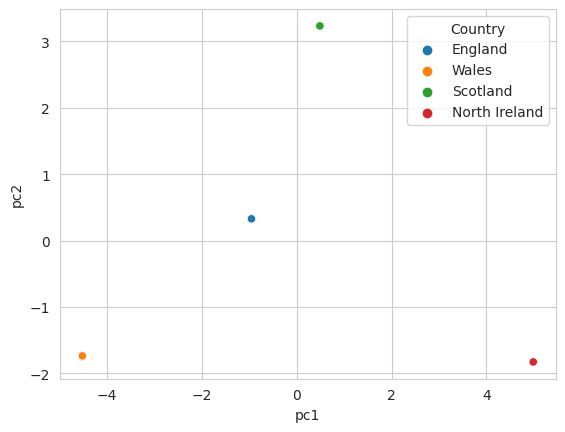

In [201]:
# using sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
Z = scaler.fit_transform(st_data)
pca = PCA(2)
pca.fit(Z)
pca_df = pca.transform(Z)
df = pd.DataFrame(pca_df, columns=['pc1', 'pc2'])
sns.scatterplot(data=df, x='pc1', y='pc2', hue=Country);

##### **Q6. `scatterplot`의 가장 왼쪽에 위치하고 있는 나라는 어디인가요?**

**`이곳에 Q6에 대한 답을 작성하세요.`**
- 정답 : Wales

## **Part 3. Clustering**

### **3-1. K-Means Clustering**

아래 데이터에 대해 K-Means Clustering을 적용한 후, 그 결과를 seaborn 라이브러리의 `scatterplot`으로 시각화하세요.
- `n_clusters = 4`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.
- `scatterplot`의 hue 파라미터를 설정하여, cluster 별로 데이터가 어디에 위치해 있는지 확인합니다.
  - x축에는 `x`, y축에는 `y` column을 지정합니다.


In [161]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
plt.style.use("default")

In [151]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


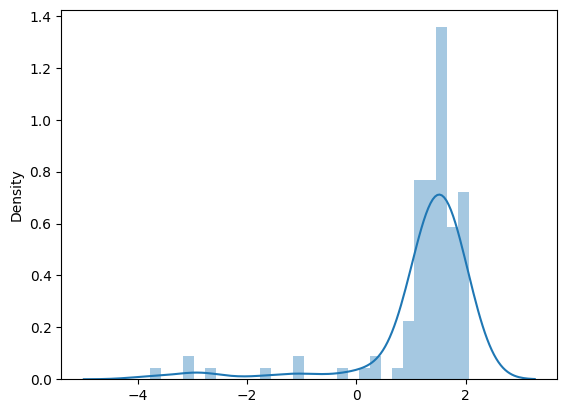

In [152]:
points_log = np.log(points)
sns.distplot(points_log);

In [155]:
scaler = StandardScaler()
features = scaler.fit_transform(points_log)
features =pd.DataFrame(features)
features = features.fillna(0)
features = np.array(features)

In [156]:
print('mean:',features.mean(axis=0).round(2))
print('std:',features.std(axis=0).round(2))

mean: [-0.  0.]
std: [0.47 0.57]


In [159]:
# k-means  clustering 모델 학습
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(features)

# 고객별 클러스터 지정 
cluster_labels = kmeans.labels_

points = points.assign(Cluster= cluster_labels)

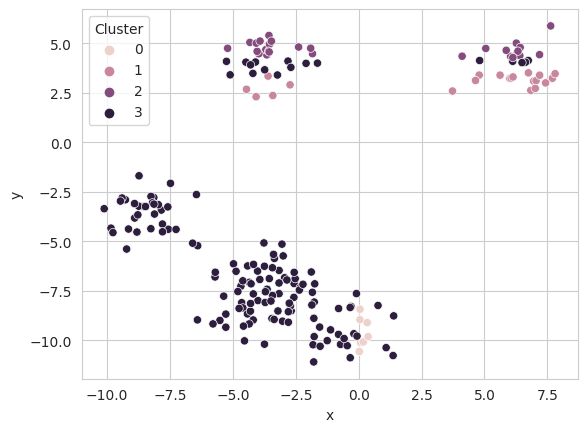

In [174]:
label = points.Cluster
sns.set_style('whitegrid')
sns.scatterplot(data=points, x='x', y='y', hue=label);
plt.show();

##### **Q7. scatterplot에서 가장 우측 상단에 위치해 있는 cluster는 무엇인가요?**

**`이곳에 Q7에 대한 답을 작성하세요.`**
- 정답 : Cluster 2

## **Part 4. 도전 과제**

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 **2개의 추가 조건들 중 하나**를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)



### **4-1. Scree plot** 




#### **`2-2-b.`에서 진행한 PCA 결과에 대해서 `Scree plot`을 추가하세요.**

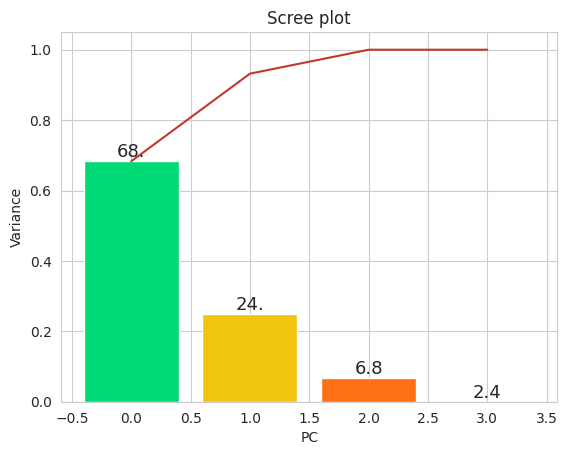

In [176]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#c0392b']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

##### **Q8. PC1이 포함하고 있는 variance의 비율을 반올림하여 소수점 둘째 자리까지 구하세요.**

In [177]:
round(pca.explained_variance_ratio_[0],2)

0.68

### **4-2. Elbow Methods**



##### **Q9. Elbow Methods를 활용하여 `Part 3. Clustering`에서 최적의 k값을 선택하는 과정을 논리적으로 설명하세요.**


In [179]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(features)
  sse[k] = kmeans.inertia_

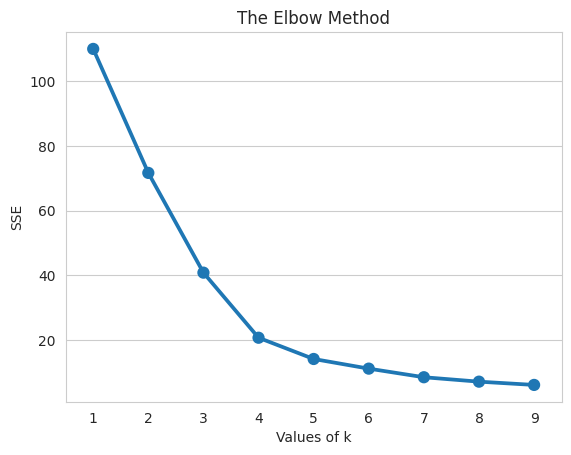

In [180]:
# 결과 시각화

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

**`이곳에 Q9에 대한 답을 작성하세요.`**

- 정답 : 위 그림에서 보이듯이 X축에 따라 Y축의 감소율이 크게 작아지는 4번 Cluster을 팔꿈치(elbow)라고 하며 이를 최적의 K값으로 선택하여 K-Means Clustering을 진행하는 것이 좋을것 같습니다.




